# Analysis:

The following analysis randomly selects 500+ cities of varying distance from the equator and gathers data on the Temperature, Humidity, Cloudiness, and Wind Speed in each city.

1. Of the observed variables, Temperature is most closely correlated with distance from the equator.

2. There is no observable trend between Latitude and Wind Speed or Cloudiness.

3. It would take deeper analysis to draw a conclusion on the correlation between Latitude and Humidity. There appears to be a patterns but it is not very discernable and would take several rounds of random data and perhaps a regression analysis.

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime, time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [17]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# Remove duplicates
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


620

In [18]:
city_weather = pd.DataFrame(cities)
city_weather.head()

,0
0,rhyl
1,mahebourg
2,busselton
3,vestmanna
4,vila franca do campo


## Perform API Calls

In [19]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 


In [20]:
final_cities = []
latitude = []
temperature = []
humidity = []
cloudiness = []
wind = []


for city in cities:
    time.sleep(1)
    city_number = cities.index(city)
    try:
        query_url = url + "&q=" + city
        response = requests.get(query_url).json()        
        latitude.append(response['coord']['lat'])
        temperature.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        print(f'{city_number}: Retreiving data for {city}')
        print(f'      ------> Data successfully stored!')
        final_cities.append(response['name'])
    except:
        print(f'{city_number}: Retreiving data for {city}')
        print(f'ERROR: DATA UNAVAILABLE')
        pass
#         continue

0: Retreiving data for rhyl
      ------> Data successfully stored!
1: Retreiving data for mahebourg
      ------> Data successfully stored!
2: Retreiving data for busselton
      ------> Data successfully stored!
3: Retreiving data for vestmanna
      ------> Data successfully stored!
4: Retreiving data for vila franca do campo
      ------> Data successfully stored!
5: Retreiving data for sao gabriel da cachoeira
      ------> Data successfully stored!
6: Retreiving data for klaksvik
      ------> Data successfully stored!
7: Retreiving data for aksu
      ------> Data successfully stored!
8: Retreiving data for coquimbo
      ------> Data successfully stored!
9: Retreiving data for tuktoyaktuk
      ------> Data successfully stored!
10: Retreiving data for kodiak
      ------> Data successfully stored!
11: Retreiving data for hamilton
      ------> Data successfully stored!
12: Retreiving data for isangel
      ------> Data successfully stored!
13: Retreiving data for spokane
      

114: Retreiving data for tsihombe
ERROR: DATA UNAVAILABLE
115: Retreiving data for sokoni
      ------> Data successfully stored!
116: Retreiving data for ponta do sol
      ------> Data successfully stored!
117: Retreiving data for bengkulu
ERROR: DATA UNAVAILABLE
118: Retreiving data for kaitangata
      ------> Data successfully stored!
119: Retreiving data for manzhouli
      ------> Data successfully stored!
120: Retreiving data for puerto colombia
      ------> Data successfully stored!
121: Retreiving data for thompson
      ------> Data successfully stored!
122: Retreiving data for hobyo
      ------> Data successfully stored!
123: Retreiving data for eureka
      ------> Data successfully stored!
124: Retreiving data for shingu
      ------> Data successfully stored!
125: Retreiving data for meulaboh
      ------> Data successfully stored!
126: Retreiving data for poum
      ------> Data successfully stored!
127: Retreiving data for punta arenas
      ------> Data successfully

229: Retreiving data for polewali
      ------> Data successfully stored!
230: Retreiving data for broken hill
      ------> Data successfully stored!
231: Retreiving data for yar-sale
      ------> Data successfully stored!
232: Retreiving data for carbonia
      ------> Data successfully stored!
233: Retreiving data for leninskoye
      ------> Data successfully stored!
234: Retreiving data for elverum
      ------> Data successfully stored!
235: Retreiving data for daru
      ------> Data successfully stored!
236: Retreiving data for margate
      ------> Data successfully stored!
237: Retreiving data for attawapiskat
ERROR: DATA UNAVAILABLE
238: Retreiving data for ketchikan
      ------> Data successfully stored!
239: Retreiving data for santa maria
      ------> Data successfully stored!
240: Retreiving data for luderitz
      ------> Data successfully stored!
241: Retreiving data for ust-maya
      ------> Data successfully stored!
242: Retreiving data for manbij
      ------> D

342: Retreiving data for burnie
      ------> Data successfully stored!
343: Retreiving data for jalu
      ------> Data successfully stored!
344: Retreiving data for pochutla
      ------> Data successfully stored!
345: Retreiving data for kasongo-lunda
      ------> Data successfully stored!
346: Retreiving data for wulanhaote
ERROR: DATA UNAVAILABLE
347: Retreiving data for krasnoarmeysk
      ------> Data successfully stored!
348: Retreiving data for saint-joseph
      ------> Data successfully stored!
349: Retreiving data for humboldt
      ------> Data successfully stored!
350: Retreiving data for zhigansk
      ------> Data successfully stored!
351: Retreiving data for atka
ERROR: DATA UNAVAILABLE
352: Retreiving data for saint pete beach
      ------> Data successfully stored!
353: Retreiving data for amderma
ERROR: DATA UNAVAILABLE
354: Retreiving data for portland
      ------> Data successfully stored!
355: Retreiving data for mackenzie
      ------> Data successfully stored

455: Retreiving data for beloha
      ------> Data successfully stored!
456: Retreiving data for terney
      ------> Data successfully stored!
457: Retreiving data for college
      ------> Data successfully stored!
458: Retreiving data for fereydun kenar
      ------> Data successfully stored!
459: Retreiving data for luau
      ------> Data successfully stored!
460: Retreiving data for sulangan
      ------> Data successfully stored!
461: Retreiving data for cabedelo
      ------> Data successfully stored!
462: Retreiving data for alihe
      ------> Data successfully stored!
463: Retreiving data for zhetybay
ERROR: DATA UNAVAILABLE
464: Retreiving data for takaka
      ------> Data successfully stored!
465: Retreiving data for samusu
ERROR: DATA UNAVAILABLE
466: Retreiving data for campobasso
      ------> Data successfully stored!
467: Retreiving data for tucuman
      ------> Data successfully stored!
468: Retreiving data for ust-kuyga
      ------> Data successfully stored!
469:

570: Retreiving data for aguia branca
      ------> Data successfully stored!
571: Retreiving data for kathu
      ------> Data successfully stored!
572: Retreiving data for palampur
      ------> Data successfully stored!
573: Retreiving data for bagdarin
      ------> Data successfully stored!
574: Retreiving data for laje
      ------> Data successfully stored!
575: Retreiving data for tautira
      ------> Data successfully stored!
576: Retreiving data for ahuimanu
      ------> Data successfully stored!
577: Retreiving data for artyom
      ------> Data successfully stored!
578: Retreiving data for vega de alatorre
      ------> Data successfully stored!
579: Retreiving data for sao filipe
      ------> Data successfully stored!
580: Retreiving data for port hardy
      ------> Data successfully stored!
581: Retreiving data for kargil
      ------> Data successfully stored!
582: Retreiving data for esso
      ------> Data successfully stored!
583: Retreiving data for parabel
     

In [21]:
len(final_cities)

547

In [22]:
weather_data = {
    "City": final_cities,
    "Latitude": latitude,
    "Temperature (F)": temperature,
    "Humidity (%)": humidity,
    "Cloudiness (%)": cloudiness,
    "Wind Speed (mph)": wind
}



In [23]:
city_weather = pd.DataFrame(weather_data)
city_weather.head()

,City,Latitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Rhyl,53.32,50.05,100,20,5.82
1,Mahebourg,-20.41,71.60,73,40,12.75
2,Busselton,-33.64,60.67,100,80,12.44
3,Vestmanna,62.16,51.80,100,92,12.75
4,Vila Franca do Campo,37.72,71.60,83,75,25.28


In [24]:
#What follows is an unsuccessful attempt to append variables directly into a dataframe named city_weather with an index of "cities" and blank columns for Temp, Humidity, etc
#I changed my method to gather separate lists first, then compile a dataframe, since I could not identify the Key Error

#for index, row in city_weather.iterrows():
#    time.sleep(2)
#    query_url = url + "&q=" + city
#    weather_response = requests.get(query_url)
#    weather_json = weather_response.json()
#    try:
#        temperature = city_weather["main"]["temp"]
#        humidity = city_weather["main"]["humidity"]
#        cloudiness = city_weather["clouds"]["all"]
#        wind_speed = city_weather["wind"]["speed"]
#        latitude = city_weather["coord"]["lat"]
        
#        city_weather.set_value(index, "Temperature", temperature)
#        city_weather.set_value(index,"Humidity", humidity)
#        city_weather.set_value(index,"Cloudiness", cloudiness)
#        city_weather.set_value(index,"Wind Speed", wind_speed)
#    except:
#        print("Weather data error- skipped")
        

In [25]:
city_weather.to_csv("city-weather.csv", index=False, header=True)

In [26]:
date = time.strftime("%D")

date

'10/11/18'

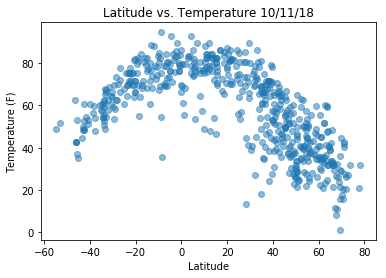

In [27]:
plt.scatter(city_weather["Latitude"],city_weather["Temperature (F)"], alpha = 0.5)

plt.title(f'Latitude vs. Temperature {date}')
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")



plt.savefig("Temp.png")
plt.show()

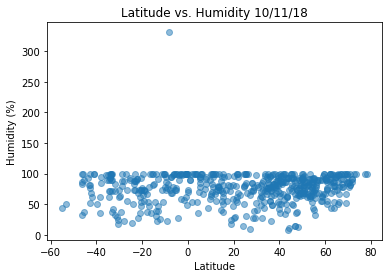

In [28]:
plt.scatter(city_weather["Latitude"],city_weather["Humidity (%)"], alpha = 0.5)

plt.title(f'Latitude vs. Humidity {date}')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")



plt.savefig("Humid.png")
plt.show()

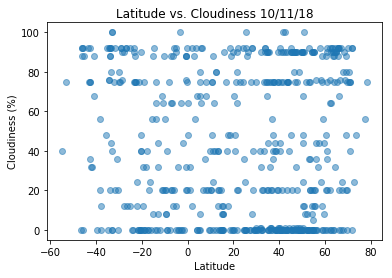

In [29]:
plt.scatter(city_weather["Latitude"],city_weather["Cloudiness (%)"], alpha = 0.5)

plt.title(f'Latitude vs. Cloudiness {date}')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")



plt.savefig("Cloud.png")
plt.show()

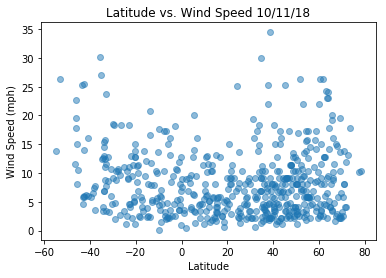

In [30]:
plt.scatter(city_weather["Latitude"],city_weather["Wind Speed (mph)"], alpha = 0.5)

plt.title(f'Latitude vs. Wind Speed {date}')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")



plt.savefig("Wind.png")
plt.show()